In [1]:
%pip install openpyxl==2.6.4

  Using cached https://files.pythonhosted.org/packages/f0/da/572cbc0bc582390480bbd7c4e93d14dc46079778ed915b505dc494b37c57/jdcal-1.4.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import io
import collections
import pandas as pd
import matplotlib.pyplot as plt
from rdflib import ConjunctiveGraph
from rdflib.plugins.sparql.results.csvresults import CSVResultSerializer

pd.set_option('display.max_colwidth', 200)

if not os.path.exists('outputs'):
    os.makedirs('outputs')
    
g = ConjunctiveGraph()
g.parse('data.trig', format='trig')

def query(q):
    serializer = CSVResultSerializer(g.query(q))
    output = io.BytesIO()
    serializer.serialize(output)
    return pd.read_csv(io.StringIO(output.getvalue().decode('utf-8')), encoding='utf-8')
    
def write(df, fn):
    df.to_excel('outputs/{}'.format(fn), encoding='utf-8')

In [3]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?date ?ri_acronym ?ri_website ?ri_domain ?rep_label WHERE {
    ?g dcterms:date ?date .
    GRAPH ?g { 
        ?ri a rm:ResearchInfrastructure .
        ?ri envri:acronym ?ri_acronym . 
        ?ri envri:website ?ri_website .
        ?ri envri:hasDomain ?ri_domain .
        ?ri envri:hasRepository ?rep .
        ?rep a envri:Repository .
        ?rep rdfs:label ?rep_label .
    }
    # FILTER (?date > "2019-01-01"^^xsd:date)
    FILTER (?ri_acronym = "ICOS")
}
""")

display(q)
write(q, 'output-1repos.xlsx')

,date,ri_acronym,ri_website,ri_domain,rep_label
0,2019-04-01,ICOS,http://www.icos-cp.eu,n100,Carbon Portal


In [14]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name
0,CLOUDNET,CF-standard names
1,SeaDataNet Central Data Products,SeaDataNet CDI
2,SeaDataNet Central Data Products,ISO 19115/19139
3,SeaDataNet Central Data Products,NERC vocabulary service
4,SeaDataNet Central Data Products,EDMO
5,norwegian Polar Data Centre,CF standard names
6,Terradue,http://envri.eu/ns/none
7,ANAEE-France Metadata Catalog,ANAEETHES
8,ASC,CF-standard names
9,Marine Data Archive,WoRMS


In [7]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>

SELECT ?p WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
}
""")

display(q)
write(q, 'output-3.xlsx')

,p
0,http://envri.eu/ns/contentAccessAuthorizationRequired
1,http://envri.eu/ns/hasAuthenticationMethod
2,http://envri.eu/ns/maintainsOwnUserDatabase
3,http://envri.eu/ns/usesAuthorisationTechnique


In [8]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-4.xlsx')

,l,p,o,li
0,ACTRIS ACTRIS-ACCESS metadata,http://envri.eu/ns/hasHarvestingMethods,http://envri.eu/ns/none,NaN
1,EISCAT Madrigal metadata,http://envri.eu/ns/hasHarvestingMethods,http://envri.eu/ns/none,NaN
2,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/hasHarvestingMethods,n337,http://envri.eu/ns/OAI-PMH
3,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/hasHarvestingMethods,n337,http://envri.eu/ns/THREDDS_NcISO
4,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/hasHarvestingMethods,n337,https://www.wikidata.org/entity/Q7072878
...,...,...,...,...
304,ACTRIS CLOUDNET data,http://envri.eu/ns/dataSchemaIsRegistered,http://envri.eu/ns/planned,NaN
305,SIOS norwegian Meteorological Institute data,http://envri.eu/ns/dataSchemaIsRegistered,http://envri.eu/ns/none,NaN
306,SIOS norwegian Polar Data Centre data,http://envri.eu/ns/dataSchemaIsRegistered,http://envri.eu/ns/none,NaN
307,SDN SeaDataNet Central Data Products data,http://envri.eu/ns/dataSchemaIsRegistered,http://envri.eu/ns/none,NaN


In [9]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName ?schema_name
           ]
         ]
       ]
}
""")

display(q)
write(q, 'output-5.xlsx')

,rep_label,schema_name
0,ASC,https://www.wikidata.org/entity/Q30079268
1,IAGOS repository,http://envri.eu/ns/INSPIRE
2,RESIF (France),http://envri.eu/ns/FDSNStationXML
3,ANAEE-France Metadata Catalog,https://www.wikidata.org/entity/Q50377276
4,ANAEE-France Metadata Catalog,https://www.wikidata.org/entity/Q30079268
5,SeaDataNet Common DAta Index (CDI),http://envri.eu/ns/SeaDataNetCommunityProfile
6,SeaDataNet Common DAta Index (CDI),http://envri.eu/ns/ISO19115_19139
7,ACTRIS-ACCESS,http://envri.eu/ns/NasaAmesASCII
8,Marine Data Archive,https://www.wikidata.org/entity/Q50377276
9,Marine Data Archive,http://envri.eu/ns/EML2.0


In [10]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I1_metadata.xlsx')

,l,p,o,li
0,ACTRIS ACTRIS-ACCESS metadata,http://envri.eu/ns/hasHarvestingMethods,http://envri.eu/ns/none,NaN
1,EISCAT Madrigal metadata,http://envri.eu/ns/hasHarvestingMethods,http://envri.eu/ns/none,NaN
2,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/hasHarvestingMethods,n337,http://envri.eu/ns/OAI-PMH
3,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/hasHarvestingMethods,n337,http://envri.eu/ns/THREDDS_NcISO
4,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/hasHarvestingMethods,n337,https://www.wikidata.org/entity/Q7072878
...,...,...,...,...
304,ACTRIS CLOUDNET data,http://envri.eu/ns/dataSchemaIsRegistered,http://envri.eu/ns/planned,NaN
305,SIOS norwegian Meteorological Institute data,http://envri.eu/ns/dataSchemaIsRegistered,http://envri.eu/ns/none,NaN
306,SIOS norwegian Polar Data Centre data,http://envri.eu/ns/dataSchemaIsRegistered,http://envri.eu/ns/none,NaN
307,SDN SeaDataNet Central Data Products data,http://envri.eu/ns/dataSchemaIsRegistered,http://envri.eu/ns/none,NaN


In [11]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1persistency.xlsx')

,l,p,o,li
0,ACTRIS ASC data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n280,http://envri.eu/ns/ModellingTools
1,ACTRIS ASC data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n280,http://envri.eu/ns/DataGenerationTools
2,ACTRIS CLOUDNET data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n364,http://envri.eu/ns/NWPmodelEvaluationService
3,ANAEE-France ANAEE-France Metadata Catalog data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
4,EPOS Terradue data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
5,LW (Marine) Marine Data Archive data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
6,ACTRIS EARLINET Database data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n302,http://envri.eu/ns/DOIGeneration
7,ACTRIS EARLINET Database data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n302,http://envri.eu/ns/QA_QC
8,EPOS VERCE Seismic Forward Modeling Experimental Data data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n726,https://www.wikidata.org/entity/Q28846483
9,EISCAT EISCAT Schedule data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN


In [12]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A2nix.xlsx')

,l,p,o,li


In [13]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_1access.xlsx')

,l,p,o,li
0,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/supportsAccessTechnology,file:///home/jovyan/fixed/fairness-assessment/http,NaN
1,Euro-Argo Euro-Argo Data access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q42283,NaN
2,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN
3,EPOS EPOS CSW access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q8777,NaN
4,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN
...,...,...,...,...
62,ACTRIS CLOUDNET access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://www.w3.org/wiki/UriSchemes/http,NaN
63,EISCAT Madrigal access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://www.eiscat.se/wp-content/uploads/2017/06/BlueBook_Edition2015.pdf,NaN
64,LW (Marine) EUROBIS access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://doi.org/10.17487%2FRFC2616,NaN
65,ICOS Carbon Portal access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://doi.org/10.17487%2FRFC2616,NaN


In [14]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_2accesstechn.xlsx')

,l,p,o,li
0,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
1,Euro-Argo Euro-Argo Data access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
2,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
3,EPOS EPOS CSW access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
4,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,true,NaN
...,...,...,...,...
98,EISCAT Madrigal access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,http://envri.eu/ns/none,NaN
99,LW (Marine) EUROBIS access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,http://envri.eu/ns/SSQLService,NaN
100,ICOS Carbon Portal access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,https://www.wikidata.org/entity/Q743238,NaN
101,ACTRIS ACTRIS - In-Situ unit access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,https://www.wikidata.org/entity/Q161157,NaN


In [15]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I2vocab.xlsx')

,l,p,o,li
0,ACTRIS ACTRIS-ACCESS metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,false,NaN
1,EISCAT Madrigal metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,false,NaN
2,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,partially,NaN
3,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
4,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
...,...,...,...,...
65,eLTER DEIMS-SDR vocabularies,http://envri.eu/ns/hasVocabularyIri,http://vocabs.lter-europe.net/EnvThes/,NaN
66,ACTRIS ACTRIS - In-Situ unit vocabularies,http://envri.eu/ns/hasVocabularyIri,http://cfconventions.org/latest.html,NaN
67,SDN SeaDataNet Common DAta Index (CDI) vocabularies,http://envri.eu/ns/hasVocabularyIri,https://cdi.seadatanet.org,NaN
68,SDN SeaDataNet Central Data Products vocabularies,http://envri.eu/ns/hasVocabularyIri,https://cdi.seadatanet.org,NaN


In [16]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I3.xlsx')

,l,p,o,li


In [17]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1.xlsx')

,l,p,o,li


In [18]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_1_license.xlsx')

,l,p,o,li
0,SIOS repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/none,NaN
1,EPOS repository,http://envri.eu/ns/hasPolicies,n248,http://envri.eu/ns/Acknowledgements
2,EPOS repository,http://envri.eu/ns/hasPolicies,n248,http://envri.eu/ns/Citation
3,ACTRIS repository,http://envri.eu/ns/hasPolicies,n310,https://www.wikidata.org/entity/Q189439
4,ACTRIS repository,http://envri.eu/ns/hasPolicies,n310,http://envri.eu/ns/dataPolicy
...,...,...,...,...
137,ACTRIS ACTRIS - In-Situ unit access mechanism,http://envri.eu/ns/usesDataLicenses,http://envri.eu/ns/none,NaN
138,EPOS European Federated Data Archive access mechanism,http://envri.eu/ns/usesDataLicenses,n582,http://www.wikidata.org/entity/Q6905323
139,EPOS Terradue access mechanism,http://envri.eu/ns/usesDataLicenses,n215,http://www.wikidata.org/entity/Q6936496
140,EPOS Terradue access mechanism,http://envri.eu/ns/usesDataLicenses,n215,http://www.wikidata.org/entity/Q6905323


In [19]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_2prov.xlsx')

,l,p,o,li
0,ACTRIS ACTRIS-ACCESS metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
1,EISCAT Madrigal metadata,http://envri.eu/ns/hasMachineReadableProvenance,http://envri.eu/ns/planned,NaN
2,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
3,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
4,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
5,LW (Marine) Marine Data Archive metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
6,eLTER DEIMS-SDR metadata,http://envri.eu/ns/hasMachineReadableProvenance,machine readable provenance,NaN
7,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
8,ACTRIS CLOUDNET metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
9,ACTRIS EARLINET Database metadata,http://envri.eu/ns/hasMachineReadableProvenance,true,NaN


In [20]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_3.xlsx')

,l,p,o,li
0,ASC data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
1,norwegian Polar Data Centre data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
2,norwegian Meteorological Institute data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
3,EPOS INGV data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
4,EISCAT Schedule data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
5,CLOUDNET data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
6,SeaDataNet Central Data Products data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
7,SeaDataNet Common DAta Index (CDI) data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
8,ACTRIS-ACCESS data management plans,http://envri.eu/ns/hasComplianceValidationService,http://envri.eu/ns/none,NaN
9,ANAEE-France Metadata Catalog data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN


In [21]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F1ID.xlsx')

,l,p,o,li
0,ACTRIS GRES identifier,http://envri.eu/ns/isAssigned,manually,NaN
1,eLTER EUDAT/FZJ B2SHARE identifier,http://envri.eu/ns/isAssigned,automatically,NaN
2,EPOS EPOS CSW identifier,http://envri.eu/ns/isAssigned,automatically,NaN
3,SIOS norwegian Meteorological Institute identifier,http://envri.eu/ns/isAssigned,automatically,NaN
4,EPOS Terradue identifier,http://envri.eu/ns/isAssigned,manually,NaN
...,...,...,...,...
83,ACTRIS ACTRIS-ACCESS identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/none,NaN
84,ICOS Carbon Portal identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q58333293,NaN
85,EPOS EPOS INGV identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q58333293,NaN
86,ACTRIS ASC identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q58333293,NaN


In [22]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F2machinereadab.xlsx')

,l,p,o,li
0,ACTRIS ACTRIS-ACCESS metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://envri.eu/ns/none,NaN
1,EISCAT Madrigal metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,https://www.eiscat.se/madrigal/cgi-bin/madDataBrowse?fileName=/opt/madrigal/experiments/2014/eis/10feb14/NCAR_2014-02-10_manda_60_vhf.bin,NaN
2,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,https://thredds.nilu.no/thredds/iso/ebas/ZA0001G.20160101000000.20190211140714.uv_abs.ozone.air.3y.1h.ZA02L_thermo_4m.ZA02L_primary_standard_49i_PS.lev2.nc?catalog=http%3A%2F%2Fthredds.nilu.no%2Ft...,NaN
3,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://envri.eu/ns/planned,NaN
4,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,https://www.wikidata.org/entity/Q513000,NaN
...,...,...,...,...
76,EISCAT EISCAT Schedule identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN
77,ACTRIS ACTRIS-ACCESS identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/planned,NaN
78,EPOS EPOS INGV identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN
79,ANAEE-France ANAEE-France Metadata Catalog identifier,http://envri.eu/ns/includesMetadataSchema,https://www.wikidata.org/entity/Q513000,NaN


In [23]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F3pidsincl.xlsx')

,l,p,o,li
0,SIOS repository,http://envri.eu/ns/hasMetadata,n854,NaN
1,EPOS repository,http://envri.eu/ns/hasMetadata,n243,NaN
2,ACTRIS repository,http://envri.eu/ns/hasMetadata,n304,NaN
3,SIOS repository,http://envri.eu/ns/hasMetadata,n825,NaN
4,SDN repository,http://envri.eu/ns/hasMetadata,n60,NaN
5,EPOS repository,http://envri.eu/ns/hasMetadata,n621,NaN
6,SDN repository,http://envri.eu/ns/hasMetadata,n28,NaN
7,EISCAT repository,http://envri.eu/ns/hasMetadata,n786,NaN
8,LW (Marine) repository,http://envri.eu/ns/hasMetadata,n525,NaN
9,ACTRIS repository,http://envri.eu/ns/hasMetadata,n389,NaN


In [24]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F4 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F4sofware.xlsx')

,l,p,o,li
0,SIOS repository,http://envri.eu/ns/hasRepositoryUrl,http://thredds.met.no/thredds/catalog/catalog.html,NaN
1,EPOS repository,http://envri.eu/ns/hasRepositoryUrl,http://orfeus-eu.org/,NaN
2,ACTRIS repository,http://envri.eu/ns/hasRepositoryUrl,https://data.earlinet.org/api/services/restapi?_wadl,NaN
3,SIOS repository,http://envri.eu/ns/hasRepositoryUrl,https://data.npolar.no/dataset/,NaN
4,SDN repository,http://envri.eu/ns/hasRepositoryUrl,https://cdi.seadatanet.org/search,NaN
...,...,...,...,...
208,ACTRIS ASC metadata,http://envri.eu/ns/searchEngineIndexing,false,NaN
209,EISCAT EISCAT Schedule metadata,http://envri.eu/ns/searchEngineIndexing,true,NaN
210,EPOS VERCE Seismic Forward Modeling Experimental Data metadata,http://envri.eu/ns/searchEngineIndexing,false,NaN
211,ACTRIS GRES metadata,http://envri.eu/ns/searchEngineIndexing,false,NaN


,count
EDF ASCII,1
Joint Committee on Atomic and Molecular Physical Data,1
text,1
ASCII,5
NetCDF,9
MiniSEED,4
NetCDF CF,9
Nasa Ames ASCII,2
"MAT-file, Level 4",1
JavaScript Object Notation,2


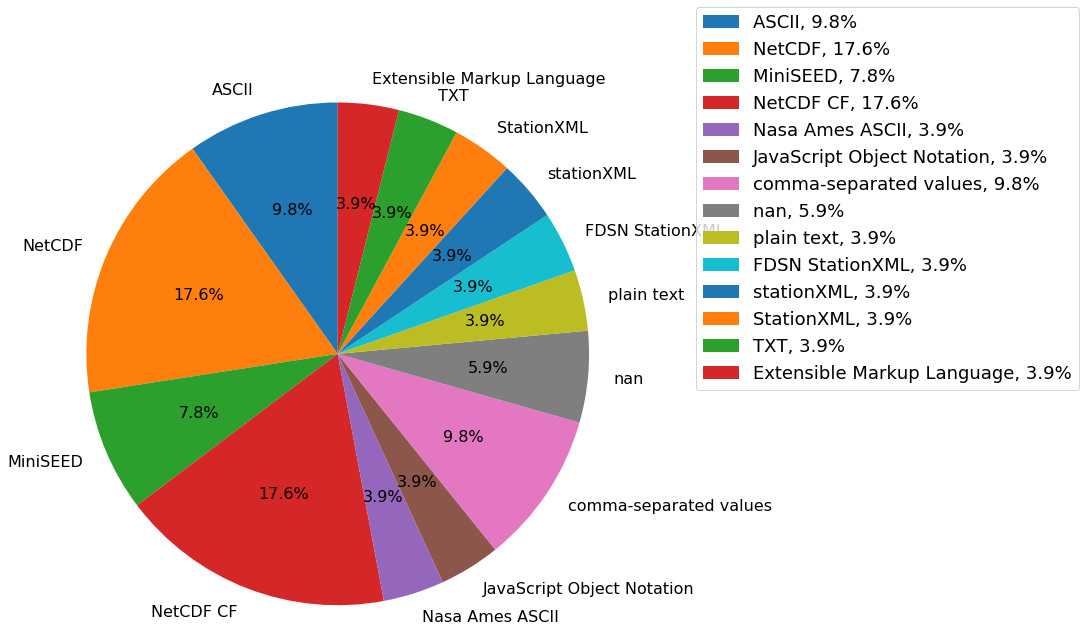

In [38]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName [ rdfs:label ?format_name ]
          ]
         ]
       ]
} 
# GROUP BY ?format_name
""")

# display(q)
write(q, 'output-6format.xlsx')

c = collections.Counter(q['format_name'])

display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 2}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 18},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [26]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?ri_domain ?rep_label ?dataschema WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasData ?data .
    ?data a wd:Q42848 .
    ?data envri:dataSchemaIsRegistered [ rdf:li [ rdfs:label ?dataschema ] ] 
}
""")

display(q)



,ri_acronym,ri_domain,rep_label,dataschema
0,IAGOS,Atmosphere,IAGOS repository,local registry
1,IAGOS,Atmosphere,IAGOS repository,local registry
2,ACTRIS,Atmosphere,ACTRIS-ACCESS,CEDA
3,LW (Marine),marine,EUROBIS,Darwin Core Archive
4,LW (Marine),marine,EUROBIS,OBIS event scheme
5,EPOS,earth,EPOS CSW,INSPIRE
6,EPOS,earth,EPOS CSW,openGIS
7,EPOS,earth,EPOS CSW,Earth sciences
8,ACTRIS,Atmosphere,ACTRIS - In-Situ unit,CEDA


,count
CF-standard names,3
CF Standard Names,2
http://envri.eu/ns/NULL,3
ANAEETHES,1
ISO 19115/19139,2
SeaDataNet CDI,2
NERC vocabulary service,2
EDMO,2
CF standard names,3
WoRMS,2


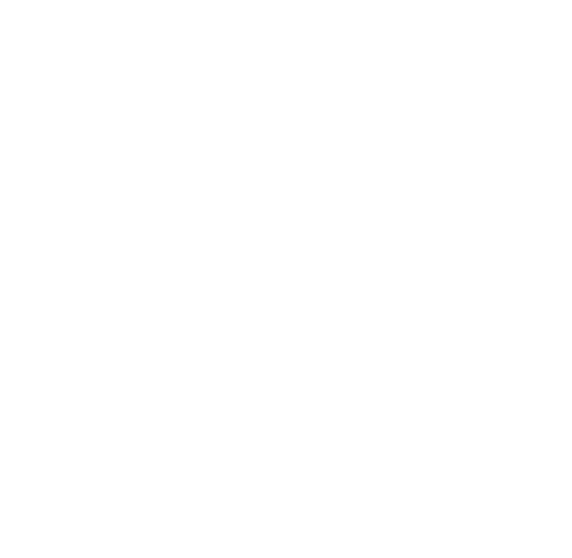

In [36]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name ?vocab_iri WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
           envri:hasVocabularyIri ?vocab_iri 
         ]
       ]
}
#group by ?vocab_name
""")

#display(q)
write(q, 'vocab.xlsx')


c = collections.Counter(q['vocab_name'])
display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 4}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

#total = sum(sizes)
#plt.legend(
#    loc='upper left',
#    labels=['%s, %1.1f%%' % (
#        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
#    prop={'size': 11},
#    bbox_to_anchor=(1, 1),
#    bbox_transform=fig1.transFigure
#)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [74]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?id_system ?id_provider WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem [ rdfs:label ?id_system ] .
    ?id envri:usesProvider [ rdfs:label ?id_provider]
}
""")

display(q)

write(q, 'id_kind.xlsx')
#    ?id a [rdfs:label ?id_kind] . 
 #   ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .


,ri_acronym,rep_label,id_system,id_provider
0,EPOS,EPOS CSW,HTTP URI,none
1,EPOS,RESIF (France),NaN,NaN
2,IAGOS,IAGOS repository,DOI,DataCite
3,SDN,SeaDataNet Common DAta Index (CDI),B2HANDLE,EUDAT
4,LW (Marine),EUROBIS,none,Local service
5,eLTER,EUDAT/FZJ B2SHARE,handle,handle
6,EISCAT,Madrigal,void type,void type
7,EPOS,MySQL,NaN,NaN
8,eLTER,eLTER CDN,NaN,NaN
9,ACTRIS,CLOUDNET,none,none


,count
identifier,34
PID,16
local ID,9
none,2
planned,2
NaN,2
digital object identifier,3


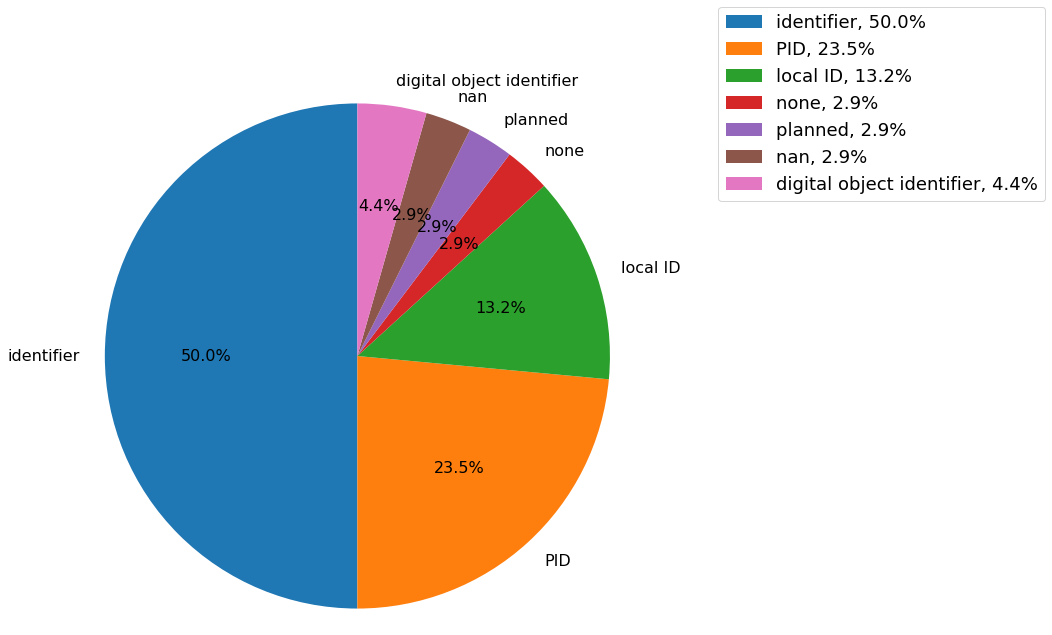

In [54]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>
SELECT ?id_kind WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
          envri:usesIdentifier [
             rdf:type [rdfs:label ?id_kind 
             ]
          ]
        ]  
} 
# GROUP BY ?id_kind
""")

#display(q)

c = collections.Counter(q['id_kind'])

display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 1}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 18},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [66]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?id_system ?id_provider WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem ?id_system .
    ?id envri:usesProvider ?id_provider
}
""")

display(q)


,ri_acronym,rep_label,id_system,id_provider
0,EPOS,European Federated Data Archive,https://www.wikidata.org/entity/Q58333293,https://www.wikidata.org/entity/Q58333293
1,EPOS,MySQL,http://envri.eu/ns/NULL,http://envri.eu/ns/NULL
2,LW (Marine),EUROBIS,https://www.wikidata.org/entity/Q25670,https://www.wikidata.org/entity/Q58333293
3,SIOS,norwegian Polar Data Centre,http://envri.eu/ns/UUID-DOI,https://www.wikidata.org/entity/Q58333293
4,LW (Marine),EUROBIS,http://envri.eu/ns/none,https://www.wikidata.org/entity/Q11412386
5,eLTER,EUDAT/FZJ B2SHARE,https://www.wikidata.org/entity/Q1575058,https://www.wikidata.org/entity/Q1575058
6,EPOS,RESIF (France),http://envri.eu/ns/NULL,http://envri.eu/ns/NULL
7,SDN,SeaDataNet Central Data Products,https://www.wikidata.org/entity/Q25670,https://www.wikidata.org/entity/Q58333293
8,ICOS,Carbon Portal,https://www.wikidata.org/entity/Q1575058,http://envri.eu/ns/PDC
9,LW (Marine),Marine Data Archive,https://www.wikidata.org/entity/Q25670,https://www.wikidata.org/entity/Q58333293


In [77]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label 
}
""")

display(q)
write(q, 'repos.xlsx')



,ri_acronym,rep_label
0,EISCAT,Madrigal
1,ANAEE-France,ANAEE-France Metadata Catalog
2,SDN,SeaDataNet Common DAta Index (CDI)
3,EPOS,European Federated Data Archive
4,EPOS,RESIF (France)
5,LifeWatch,LifeWatch Italy Portal
6,ICOS,Carbon Portal
7,SDN,SeaDataNet Central Data Products
8,EPOS,MySQL
9,eLTER,eLTER CDN


In [78]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?domain ?repos_type WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasDomain ?ri_domain .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem [ rdfs:label ?id_system ] .
    ?id envri:usesProvider [ rdfs:label ?id_provider]
}
""")

display(q)

#write(q, 'id_kind.xlsx')

,ri_acronym,rep_label,domain,repos_type
0,EPOS,EPOS CSW,NaN,NaN
1,EPOS,RESIF (France),NaN,NaN
2,IAGOS,IAGOS repository,NaN,NaN
3,SDN,SeaDataNet Common DAta Index (CDI),NaN,NaN
4,LW (Marine),EUROBIS,NaN,NaN
5,eLTER,EUDAT/FZJ B2SHARE,NaN,NaN
6,EISCAT,Madrigal,NaN,NaN
7,EPOS,MySQL,NaN,NaN
8,eLTER,eLTER CDN,NaN,NaN
9,ACTRIS,CLOUDNET,NaN,NaN


In [6]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metaData WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:includesMetadataSchema [rdf:li [ rdfs:label ?metaData ] ]
}
order by ?rep_label
""")

display(q)

,ri_acronym,rep_label,metaData
0,ACTRIS,EARLINET Database,NetCDF
1,ACTRIS,EARLINET Database,ISO 19115
2,EPOS,European Federated Data Archive,PID replica
3,EPOS,European Federated Data Archive,file location
4,EPOS,European Federated Data Archive,file checksum
5,LifeWatch,LifeWatch Italy Portal,ISO 19115/19139


In [28]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metaData WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasMetadata ?md .
    ?md hasMachineReadableDatasetMetadata ?metaData 
}
order by ?rep_label
""")

display(q)

ParseException: Expected {SelectQuery | ConstructQuery | DescribeQuery | AskQuery}, found '?'  (at char 461), (line:14, col:5)

In [3]:
 q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?metaSchema WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetaData [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?metaSchema]
          ]
         ]
       ]
} 
""")
display(q)

,rep_label,metaSchema


In [7]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metadataschema WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasMetadata ?metadata .
    ?metadata a wd:Q180160 .
    ?metadata envri:hasSchema [
    a envri:Schema ?schem
        envri:hasSchemaName [ rdf:li [ rdfs:label ?metadataschema ] ] 
        ]
}
""")

display(q)

q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName [ rdfs:label ?format_name ]
          ]
         ]
       ]
} 
# GROUP BY ?format_name
""")


# display(q)

,ri_acronym,rep_label,metadataschema


In [72]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ri_acronym ?rep_label ?schema_name WHERE {
    ?ri a rm:ResearchInfrastructure .
         ?ri envri:acronym ?ri_acronym ;
       envri:hasRepository [
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?schema_name ]
          ]
         ]
       ]
} 
""")

display(q)
write(q, 'metadataschema.xlsx')



,ri_acronym,rep_label,schema_name
0,LW (Marine),Marine Data Archive,ISO 19115
1,LW (Marine),Marine Data Archive,EML 2.0
2,LW (Marine),EUROBIS,EML 2.0
3,LW (Marine),EUROBIS,ISO 19115
4,Euro-Argo,Euro-Argo Data,NetCDF CF checker
5,Euro-Argo,Euro-Argo Data,Argo user namual
6,IAGOS,IAGOS repository,INSPIRE
7,EPOS,local EU-EIDA,SEED
8,EPOS,MySQL,DCAT Application Profile for Data Portals in Europe
9,EPOS,Terradue,ISO 19119


In [22]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metaData WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id envri:includesMetadataSchema [rdf:li [ rdfs:label ?metaData ] ]
}
order by ?rep_label
""")

display(q)

q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?schema_name ]
          ]
         ]
       ]
} 
""")

,ri_acronym,rep_label,metaData
0,ACTRIS,EARLINET Database,NetCDF
1,ACTRIS,EARLINET Database,ISO 19115
2,EPOS,European Federated Data Archive,file location
3,EPOS,European Federated Data Archive,file checksum
4,EPOS,European Federated Data Archive,PID replica
5,LifeWatch,LifeWatch Italy Portal,ISO 19115/19139


In [69]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?rep_kind ?schema_name WHERE {
     [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         rdfs:label ?rep_label ;
         rdf:type [rdf:li [rdfs:label ?rep_kind ]] ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?schema_name ]
          ]
         ]
       ]
} 
""")

display(q)

,rep_label,rep_kind,schema_name


In [70]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ri_acronym ?rep_label ?rep_kind WHERE {
     ?ri a rm:ResearchInfrastructure .
     ?ri envri:acronym ?ri_acronym .
     ?ri envri:hasRepository ?rep .
     ?rep rdfs:label ?rep_label .
     ?rep rdf:type  [rdfs:label ?rep_kind ]

FILTER (?rep_kind != "Repository")
} 

""")

display(q)
write(q, 'reposkind.xlsx')



,ri_acronym,rep_label,rep_kind
0,LW (Marine),Marine Data Archive,data repository
1,LW (Marine),EUROBIS,data repository
2,Euro-Argo,Euro-Argo Data,data repository
3,IAGOS,IAGOS repository,metadata repository
4,IAGOS,IAGOS repository,data repository
5,EPOS,local EU-EIDA,data repository
6,EPOS,MySQL,data repository
7,EPOS,Terradue,metadata repository
8,EPOS,Terradue,data repository
9,ACTRIS,CLOUDNET,data repository


In [4]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ri_acronym ?rep_label ?rep_register WHERE {
     ?ri a rm:ResearchInfrastructure .
     ?ri envri:acronym ?ri_acronym .
     ?ri envri:hasRepository ?rep .
     ?rep rdfs:label ?rep_label .
     ?rep envri:inRegistries [rdf:li [rdfs:label ?rep_register ]]


} 

""")

display(q)
write(q, 'reposregister.xlsx')

,ri_acronym,rep_label,rep_register
0,LW (Marine),EUROBIS,fairsharing.org
1,IAGOS,IAGOS repository,DataCite
2,ACTRIS,ACTRIS-ACCESS,re3data
3,ACTRIS,CLOUDNET,re3data
4,ACTRIS,ACTRIS - In-Situ unit,WIS
5,ACTRIS,ACTRIS - In-Situ unit,re3data
6,ACTRIS,ACTRIS - In-Situ unit,Global Earth Observation System of Systems
7,ICOS,Carbon Portal,re3data
8,EPOS,European Federated Data Archive,local registry
9,SDN,SeaDataNet Common DAta Index (CDI),Global Earth Observation System of Systems


In [8]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?schema_name WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName  [rdfs:label ?schema_name]
           ]
         ]
}
""")

display(q)
write(q, 'metadataschema.xlsx')




,ri_acronym,rep_label,schema_name
0,EPOS,Terradue,ISO 19119
1,ACTRIS,CLOUDNET,local schema
2,ACTRIS,GRES,Geographic Metadata XML
3,ACTRIS,EARLINET Database,ISO 19115
4,ACTRIS,ACTRIS - In-Situ unit,ISO 19115
5,ACTRIS,ACTRIS-ACCESS,Nasa Ames ASCII
6,ACTRIS,ASC,Geographic Metadata XML
7,EPOS,European Federated Data Archive,stationXML
8,EPOS,European Federated Data Archive,StationXML
9,EPOS,European Federated Data Archive,FDSN StationXML


In [16]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?vocab_name WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasVocabularies [
               envri:hasName  ?vocab_name
           ]
}
""")

display(q)
write(q, 'vocabularies.xlsx')

,ri_acronym,rep_label,vocab_name
0,EPOS,Terradue,http://envri.eu/ns/none
1,ACTRIS,CLOUDNET,CF-standard names
2,ACTRIS,GRES,CF-standard names
3,ACTRIS,EARLINET Database,CF Standard Names
4,ACTRIS,ACTRIS - In-Situ unit,CF standard names
5,ACTRIS,ACTRIS-ACCESS,CF standard names
6,ACTRIS,ASC,CF-standard names
7,EPOS,European Federated Data Archive,http://envri.eu/ns/NULL
8,EISCAT,EISCAT Schedule,http://envri.eu/ns/none
9,EISCAT,Madrigal,Cedar


In [13]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name,vocab_iri
0,CLOUDNET,CF-standard names,http://cfconventions.org/latest.html
1,SeaDataNet Central Data Products,SeaDataNet CDI,https://cdi.seadatanet.org
2,SeaDataNet Central Data Products,ISO 19115/19139,http://standards.iso.org/ittf/PubliclyAvailableStandards/ISO_19139_Schemas/resources/codelist/ML_gmxCodelists.xml
3,SeaDataNet Central Data Products,NERC vocabulary service,http://vocab.nerc.ac.uk/collection/V22/current/
4,SeaDataNet Central Data Products,EDMO,https://edmo.seadatanet.org
5,norwegian Polar Data Centre,CF standard names,http://cfconventions.org/latest.html
6,Terradue,http://envri.eu/ns/none,http://envri.eu/ns/NULL
7,ANAEE-France Metadata Catalog,ANAEETHES,http://agroportal.lirmm.fr/ontologies/ANAEETHES
8,ASC,CF-standard names,http://cfconventions.org/latest.html
9,Marine Data Archive,WoRMS,http://www.marinespecies.org/


In [17]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?schema_name WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName  [rdfs:label ?schema_name]
           ]
         ]
}
""")

display(q)
write(q, 'metadataschema.xlsx')

,ri_acronym,rep_label,schema_name
0,EPOS,Terradue,ISO 19119
1,ACTRIS,CLOUDNET,local schema
2,ACTRIS,GRES,Geographic Metadata XML
3,ACTRIS,EARLINET Database,ISO 19115
4,ACTRIS,ACTRIS - In-Situ unit,ISO 19115
5,ACTRIS,ACTRIS-ACCESS,Nasa Ames ASCII
6,ACTRIS,ASC,Geographic Metadata XML
7,EPOS,European Federated Data Archive,stationXML
8,EPOS,European Federated Data Archive,StationXML
9,EPOS,European Federated Data Archive,FDSN StationXML


In [19]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?prov WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
           envri:hasSchema [
             envri:includesProvenanceFields [rdf:li [rdfs:label ?prov]]
           ]
         ]
}
""")

display(q)
write(q, 'provinclud.xlsx')

,ri_acronym,rep_label,prov
0,ACTRIS,EARLINET Database,Data originator
1,ACTRIS,EARLINET Database,data process
2,ACTRIS,EARLINET Database,Data provider
3,EISCAT,EISCAT Schedule,text only
4,ICOS,Carbon Portal,text only
5,ICOS,Carbon Portal,simplified PROV-O
6,LifeWatch,LifeWatch Italy Portal,text only
7,LifeWatch,LifeWatch Italy Portal,text only
8,LifeWatch,LifeWatch Italy Portal,text only
9,Euro-Argo,Euro-Argo Data,codes


In [20]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?license WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasAccessMechanisms [
             envri:usesDataLicenses [rdf:li [rdfs:label ?license]]
         ]
}
""")

display(q)
write(q, 'usagelicense.xlsx')

,ri_acronym,rep_label,license
0,EPOS,Terradue,Creative Commons Attribution-NonCommercial
1,EPOS,Terradue,Creative Commons Attribution
2,EPOS,European Federated Data Archive,Creative Commons Attribution
3,EISCAT,EISCAT Schedule,local license
4,EISCAT,Madrigal,local license
5,ICOS,Carbon Portal,Creative Commons Attribution 4.0 International
6,LifeWatch,LifeWatch Italy Portal,Creative Commons Attribution 4.0 International
7,Euro-Argo,Euro-Argo Data,Creative Commons Attribution 4.0 International
8,SDN,SeaDataNet Central Data Products,local license
9,SDN,SeaDataNet Common DAta Index (CDI),local license


In [21]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?data_schema WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasData [
               envri:dataSchemaIsRegistered  [rdf:li [rdfs:label ?data_schema]]
           ]
}
""")

display(q)
write(q, 'data_schema.xlsx')

,ri_acronym,rep_label,data_schema
0,ACTRIS,ACTRIS - In-Situ unit,CEDA
1,ACTRIS,ACTRIS-ACCESS,CEDA
2,EPOS,EPOS CSW,INSPIRE
3,EPOS,EPOS CSW,Earth sciences
4,EPOS,EPOS CSW,openGIS
5,IAGOS,IAGOS repository,local registry
6,IAGOS,IAGOS repository,local registry
7,LW (Marine),EUROBIS,Darwin Core Archive
8,LW (Marine),EUROBIS,OBIS event scheme


In [23]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?categories WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:categoriesAreDefinedInRegistries ?categories
           ]
         
}
""")

display(q)
write(q, 'categories.xlsx')

,ri_acronym,rep_label,categories
0,EPOS,Terradue,false
1,ACTRIS,CLOUDNET,false
2,ACTRIS,GRES,partially
3,ACTRIS,EARLINET Database,false
4,ACTRIS,ACTRIS - In-Situ unit,partially
5,ACTRIS,ACTRIS-ACCESS,false
6,ACTRIS,ASC,partially
7,EPOS,European Federated Data Archive,true
8,EISCAT,EISCAT Schedule,false
9,EISCAT,Madrigal,false


In [25]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?metadataformat WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:hasPrimaryStorageFormat [rdfs:label ?metadataformat]
           ]
         
}
""")

display(q)
write(q, 'metadataformat.xlsx')

,ri_acronym,rep_label,metadataformat
0,EPOS,Terradue,Extensible Markup Language
1,ACTRIS,CLOUDNET,relational database
2,ACTRIS,GRES,MongoDB
3,ACTRIS,EARLINET Database,relational database
4,ACTRIS,ACTRIS - In-Situ unit,relational database
5,ACTRIS,ACTRIS-ACCESS,relational database
6,ACTRIS,ASC,MongoDB
7,EPOS,European Federated Data Archive,Extensible Markup Language
8,EISCAT,EISCAT Schedule,plain text
9,EISCAT,Madrigal,plain text


In [5]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?metadataexportformat WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:supportedExportFormats [rdf:li [rdfs:label ?metadataexportformat]]
           ]
         
}
""")

display(q)
write(q, 'metadataexportformat.xlsx')

,ri_acronym,rep_label,metadataexportformat
0,EPOS,EPOS INGV,Extensible Markup Language
1,EPOS,RESIF (France),Extensible Markup Language
2,EPOS,RESIF (France),SEED
3,SDN,SeaDataNet Central Data Products,Extensible Markup Language
4,SDN,SeaDataNet Central Data Products,HyperText Markup Language
...,...,...,...
62,LW (Marine),EUROBIS,Extensible Markup Language
63,LW (Marine),EUROBIS,JavaScript Object Notation
64,LW (Marine),EUROBIS,Rich Site Summary
65,EPOS,European Federated Data Archive,SEED


In [4]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?metadataharvesting WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:hasHarvestingMethods [rdf:li [rdfs:label ?metadataharvesting]]
           ]
         
}
""")

display(q)
write(q, 'metadataharvestingmethods.xlsx')

,ri_acronym,rep_label,metadataharvesting
0,Euro-Argo,Euro-Argo Data,OGC CSW
1,Euro-Argo,Euro-Argo Data,OAI PMH
2,Euro-Argo,Euro-Argo Data,OAI-PMH
3,Euro-Argo,Euro-Argo Data,OPeNDAP
4,ANAEE-France,ANAEE-France Metadata Catalog,Catalog Service for the Web
5,ANAEE-France,ANAEE-France Metadata Catalog,OAI PMH
6,ANAEE-France,ANAEE-France Metadata Catalog,OAI-PMH
7,SDN,SeaDataNet Common DAta Index (CDI),OGC CSW
8,SDN,SeaDataNet Central Data Products,OAI PMH
9,SDN,SeaDataNet Central Data Products,OAI-PMH


In [6]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?open WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasAccessMechanisms [
             envri:openAccessMetadata ?open
         ]
}
""")

display(q)
write(q, 'open.xlsx')


,ri_acronym,rep_label,open
0,EPOS,local EU-EIDA,True
1,EPOS,European Federated Data Archive,True
2,Euro-Argo,Euro-Argo Data,True
3,ANAEE-France,ANAEE-France Metadata Catalog,True
4,EPOS,MySQL,True
5,SDN,SeaDataNet Common DAta Index (CDI),True
6,SDN,SeaDataNet Central Data Products,True
7,EPOS,Terradue,True
8,ACTRIS,CLOUDNET,False
9,ACTRIS,ACTRIS-ACCESS,False


In [9]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?long WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:hasMetadataLongevityPlan ?long
         ]
}
""")

display(q)
write(q, 'long.xlsx')

,ri_acronym,rep_label,long
0,EPOS,local EU-EIDA,http://envri.eu/ns/NULL
1,EPOS,European Federated Data Archive,http://envri.eu/ns/NULL
2,Euro-Argo,Euro-Argo Data,https://www.nodc.noaa.gov/worlddatacenter/
3,ANAEE-France,ANAEE-France Metadata Catalog,https://www.wikidata.org/entity/Q513000
4,EPOS,MySQL,http://envri.eu/ns/NULL
5,SDN,SeaDataNet Common DAta Index (CDI),https://www.wikidata.org/entity/Q513000
6,SDN,SeaDataNet Central Data Products,https://www.wikidata.org/entity/Q513000
7,EPOS,Terradue,http://envri.eu/ns/NULL
8,ACTRIS,CLOUDNET,http://www.actris.eu/Portals/46/Publications/DataCentre/ACTRIS_Data_Management_Plan.pdf
9,ACTRIS,ACTRIS-ACCESS,http://envri.eu/ns/none
